In [41]:
import sys
import os
import scipy
import gzip
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [43]:
simulation = '1D' ## 1D 2D 3D
simulation_type = 'Moore'

day = '230503'
output_dir = '/data/project/Alzheimer/EM_cluster/00.RESULT/'+day+'/03.bioData/RMSE'
os.makedirs(output_dir, exist_ok=True)

In [44]:
input_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/Moore_' + simulation

Moore_set = [i for i in os.listdir(input_dir) if 'tsv' not in i and 'pdf' not in i and '.' not in i and 'adrenal_gland_zona' not in i]
Moore_set += ['adrenal_gland_zona_fasciculata', 'adrenal_gland_zona_glomerulosa', 'adrenal_gland_zona_reticularis']
Moore_set.sort()

print(len(Moore_set))
# fo = open(output_dir + '/1D_RMSE.txt','w')

29


### Total RMSE

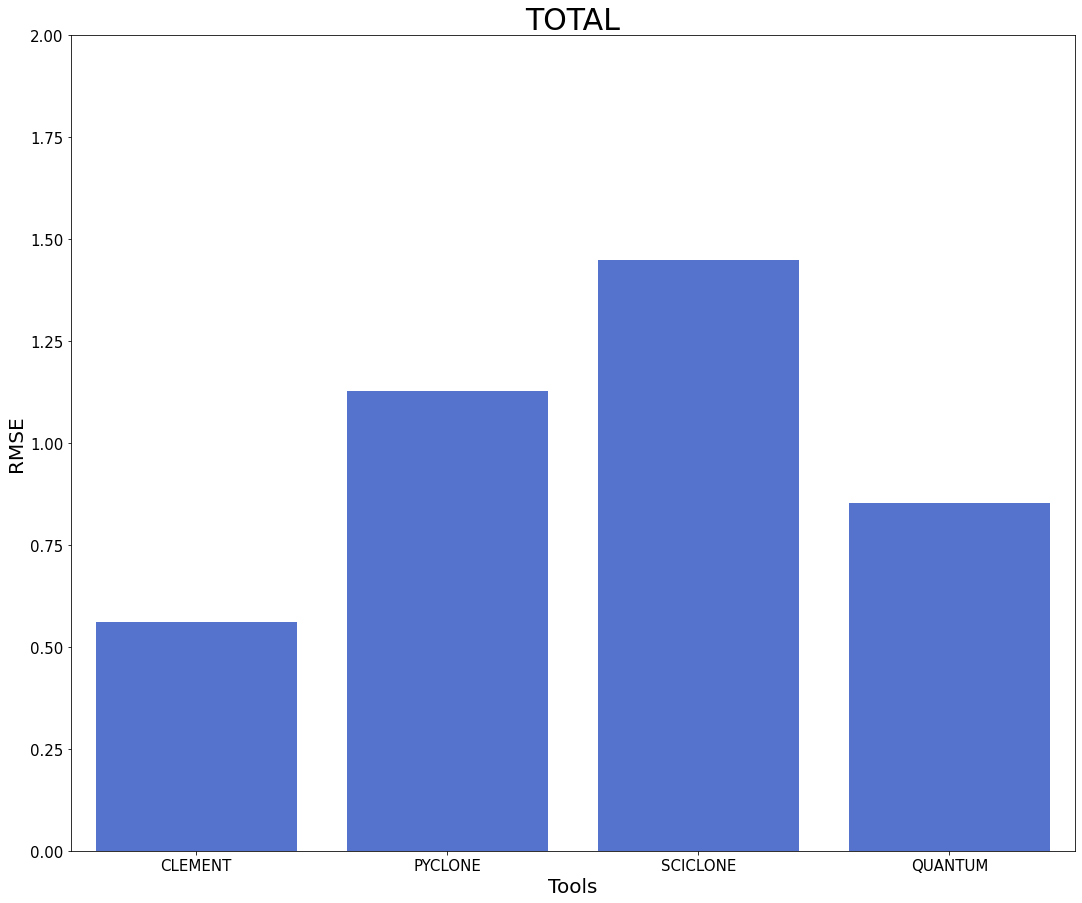

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

error = 0

total_x = []
clement_total_y = []
pyclone_total_y = []
sciclone_total_y = []
quantumclone_total_y = []

fo = open(output_dir + '/total_RMSE.txt','w')

for sample in Moore_set:
        sample_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/Moore_' + simulation + '/' + sample
        sample_set = [i for i in os.listdir(sample_dir)]
    
        for tissue in sample_set:

                f = open(sample_dir + '/' + tissue + '/Moore.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        answer = int(fline.rstrip().split('\t')[1])
                        total_x.append(answer)
                f.close()
                f = open(sample_dir + '/' + tissue + '/CLEMENT_decision.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        clement_total_y.append(predict)
                f.close()                         
                f = open(sample_dir + '/' + tissue + '/pyclonevi.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        pyclone_total_y.append(predict)                      
                f.close()
                f = open(sample_dir + '/' + tissue + '/sciclone.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        sciclone_total_y.append(predict)
                f.close()
                f = open(sample_dir + '/' + tissue + '/quantumclone.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        quantumclone_total_y.append(predict)
                f.close()
                
clement_total_RMSE = mean_squared_error(total_x , clement_total_y) ** 0.5
pyclone_total_RMSE = mean_squared_error(total_x , pyclone_total_y) ** 0.5
sciclone_total_RMSE = mean_squared_error(total_x , sciclone_total_y) ** 0.5
quantum_total_RMSE = mean_squared_error(total_x , quantumclone_total_y) ** 0.5

x_axis = ['CLEMENT', 'PYCLONE', 'SCICLONE', 'QUANTUM']
y_axis = [clement_total_RMSE, pyclone_total_RMSE, sciclone_total_RMSE, quantum_total_RMSE]

for idx in range(0,len(x_axis)):
    fo.write(x_axis[idx] + '\t' + str(y_axis[idx]) + '\n')
fo.close()

fig = plt.figure(figsize = (18,15))
# ax = sns.lineplot(x_axis, y_axis, marker = 'o', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid') # 3D
ax = sns.barplot(x_axis, y_axis, color = 'royalblue')
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('Tools', fontsize = 20)
ax.set_ylabel('RMSE', fontsize = 20)
ax.set_title('TOTAL', fontsize=30)

sc = ax.set_ylim(0, 2)
# sc = ax.set_xlim(0, 5)
ax.figure.savefig(output_dir + '/total_RMSE.pdf')

# mean_dic = {}
# for clone in range(1,4):
#     mean_dic[clone] = []

# for i,a in enumerate(x_axis):
#     mean_dic[x_axis[i]].append(y_axis[i])


In [46]:
fo = open(output_dir + '/1D_RMSE.txt','w')

error 0
0.16823164622761327 0.6201736729460423 0.8842048302391148 0.5604991454368136


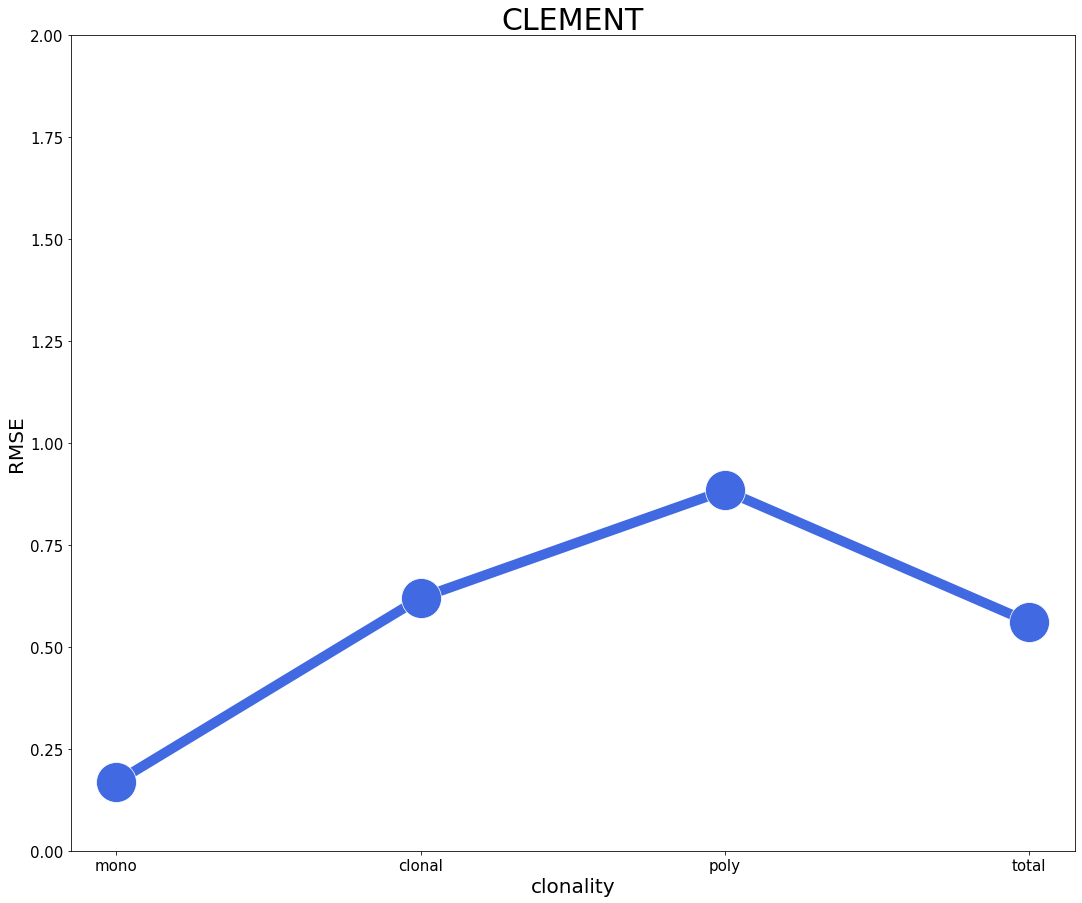

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

error = 0

mono_x = []
mono_y = []
clonal_x = []
clonal_y = []
poly_x = []
poly_y = []

total_x = []
total_y = []


for sample in Moore_set:
        sample_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/Moore_' + simulation + '/' + sample
        sample_set = [i for i in os.listdir(sample_dir)]
        
        for tissue in sample_set:
            if os.path.isfile(sample_dir + '/' + tissue + '/CLEMENT_decision.results.txt'):
                f = open(sample_dir + '/' + tissue + '/Moore.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        answer = int(fline.rstrip().split('\t')[1])
                        total_x.append(answer)
                        if answer == 1:
                            mono_x.append(answer)
                        elif answer == 2:
                            clonal_x.append(answer)
                        elif answer == 3:
                            poly_x.append(answer)
                        else:
                            print(answer)
                f.close()

                f = open(sample_dir + '/' + tissue + '/CLEMENT_decision.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        total_y.append(predict)
                        if answer == 1:
                            mono_y.append(predict)
                        elif answer == 2:
                            clonal_y.append(predict)
                        elif answer == 3:
                            poly_y.append(predict)
                f.close()
            else:
                error += 1
print('error',error)

mono_RMSE = mean_squared_error(mono_x , mono_y) ** 0.5
clonal_RMSE = mean_squared_error(clonal_x , clonal_y) ** 0.5
poly_RMSE = mean_squared_error(poly_x , poly_y) ** 0.5
total_RMSE = mean_squared_error(total_x , total_y) ** 0.5
print(mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE)
x_axis = ['mono', 'clonal', 'poly', 'total']
y_axis = [mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE]
fo.write('CLEMENT' + '\t' + 'mono' + '\t' + str(mono_RMSE) + '\n')
fo.write('CLEMENT' + '\t' + 'bi' + '\t' + str(clonal_RMSE) + '\n')
fo.write('CLEMENT' + '\t' + 'poly' + '\t' + str(poly_RMSE) + '\n')
fo.write('CLEMENT' + '\t' + 'total' + '\t' + str(total_RMSE) + '\n')

fig = plt.figure(figsize = (18,15))
ax = sns.lineplot(x_axis, y_axis, marker = 'o', markersize = 40, color = 'royalblue', linewidth = 10, linestyle = 'solid') # 3D

plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('clonality', fontsize = 20)
ax.set_ylabel('RMSE', fontsize = 20)
ax.set_title('CLEMENT', fontsize=30)

sc = ax.set_ylim(0, 2)
# sc = ax.set_xlim(0, 5)
ax.figure.savefig(output_dir + '/CLEMENT_2.pdf')

# mean_dic = {}
# for clone in range(1,4):
#     mean_dic[clone] = []

# for i,a in enumerate(x_axis):
#     mean_dic[x_axis[i]].append(y_axis[i])


error 0
1.0461068887267253 0.8412444993533733 1.513574937328539 1.1288650420603168


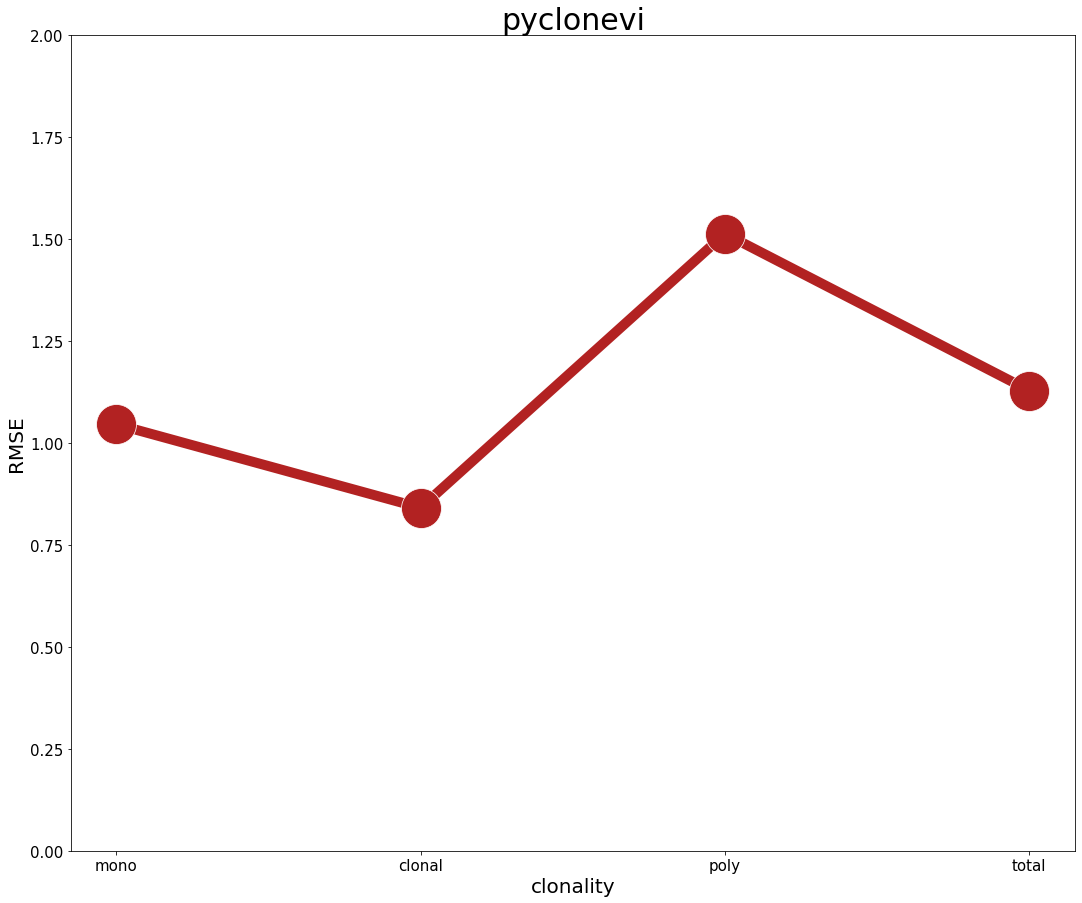

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

error = 0

mono_x = []
mono_y = []
clonal_x = []
clonal_y = []
poly_x = []
poly_y = []

total_x = []
total_y = []

for sample in Moore_set:
        sample_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/Moore_' + simulation + '/' + sample
        sample_set = [i for i in os.listdir(sample_dir)]
        
        for tissue in sample_set:
            if os.path.isfile(sample_dir + '/' + tissue + '/pyclonevi.results.txt'):
                f = open(sample_dir + '/' + tissue + '/Moore.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        answer = int(fline.rstrip().split('\t')[1])
                        total_x.append(answer)
                        if answer == 1:
                            mono_x.append(answer)
                        elif answer == 2:
                            clonal_x.append(answer)
                        elif answer == 3:
                            poly_x.append(answer)
                        else:
                            print(answer)
                f.close()

                f = open(sample_dir + '/' + tissue + '/pyclonevi.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        total_y.append(predict)
                        if answer == 1:
                            mono_y.append(predict)
                        elif answer == 2:
                            clonal_y.append(predict)
                        elif answer == 3:
                            poly_y.append(predict)
                f.close()
            else:
                error += 1
print('error',error)

mono_RMSE = mean_squared_error(mono_x , mono_y) ** 0.5
clonal_RMSE = mean_squared_error(clonal_x , clonal_y) ** 0.5
poly_RMSE = mean_squared_error(poly_x , poly_y) ** 0.5
total_RMSE = mean_squared_error(total_x , total_y) ** 0.5
print(mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE)
x_axis = ['mono', 'clonal', 'poly', 'total']
y_axis = [mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE]
fo.write('pvclone_vi' + '\t' + 'mono' + '\t' + str(mono_RMSE) + '\n')
fo.write('pvclone_vi' + '\t' + 'bi' + '\t' + str(clonal_RMSE) + '\n')
fo.write('pvclone_vi' + '\t' + 'poly' + '\t' + str(poly_RMSE) + '\n')
fo.write('pvclone_vi' + '\t' + 'total' + '\t' + str(total_RMSE) + '\n')

fig = plt.figure(figsize = (18,15))
ax = sns.lineplot(x_axis, y_axis, marker = 'o', markersize = 40, color = 'firebrick', linewidth = 10, linestyle = 'solid') # 3D

plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('clonality', fontsize = 20)
ax.set_ylabel('RMSE', fontsize = 20)
ax.set_title('pyclonevi', fontsize=30)

sc = ax.set_ylim(0, 2)
# sc = ax.set_xlim(0, 5)
# ax.figure.savefig('/data/project/Alzheimer/EM_cluster/00.RESULT/pyclonevi.pdf')
ax.figure.savefig(output_dir + '/PYCLONE_2.pdf')
# mean_dic = {}
# for clone in range(1,4):
#     mean_dic[clone] = []

# for i,a in enumerate(x_axis):
#     mean_dic[x_axis[i]].append(y_axis[i])


error 0
1.858179267099718 0.9766504768063925 0.9145291883606758 1.4482213686944971


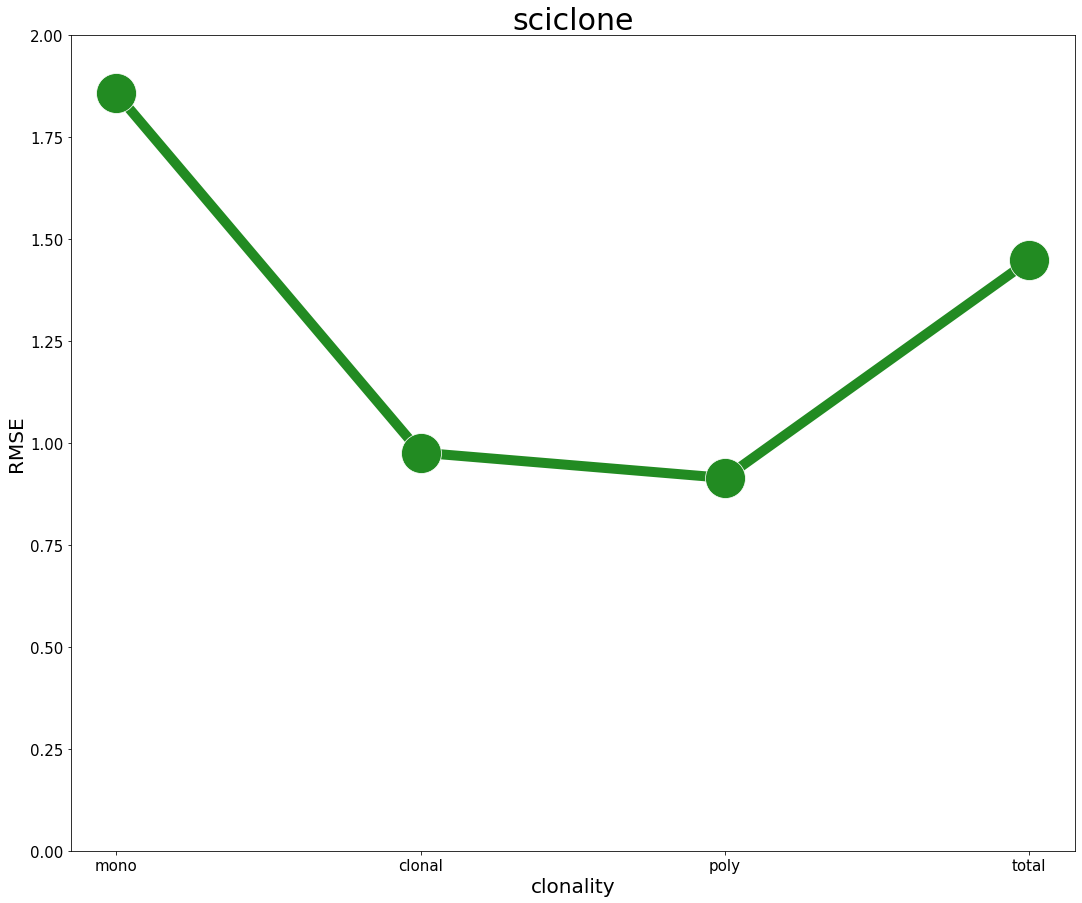

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

error = 0

mono_x = []
mono_y = []
clonal_x = []
clonal_y = []
poly_x = []
poly_y = []

total_x = []
total_y = []

for sample in Moore_set:
        sample_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/Moore_' + simulation + '/' + sample
        sample_set = [i for i in os.listdir(sample_dir)]
        
        for tissue in sample_set:
            if os.path.isfile(sample_dir + '/' + tissue + '/sciclone.results.txt'):
                f = open(sample_dir + '/' + tissue + '/Moore.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        answer = int(fline.rstrip().split('\t')[1])
                        total_x.append(answer)
                        if answer == 1:
                            mono_x.append(answer)
                        elif answer == 2:
                            clonal_x.append(answer)
                        elif answer == 3:
                            poly_x.append(answer)
                        else:
                            print(answer)
                f.close()

                f = open(sample_dir + '/' + tissue + '/sciclone.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        total_y.append(predict)
                        if answer == 1:
                            mono_y.append(predict)
                        elif answer == 2:
                            clonal_y.append(predict)
                        elif answer == 3:
                            poly_y.append(predict)
                f.close()
            else:
                error += 1
print('error',error)

mono_RMSE = mean_squared_error(mono_x , mono_y) ** 0.5
clonal_RMSE = mean_squared_error(clonal_x , clonal_y) ** 0.5
poly_RMSE = mean_squared_error(poly_x , poly_y) ** 0.5
total_RMSE = mean_squared_error(total_x , total_y) ** 0.5
print(mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE)
x_axis = ['mono', 'clonal', 'poly', 'total']
y_axis = [mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE]
fo.write('sciclone' + '\t' + 'mono' + '\t' + str(mono_RMSE) + '\n')
fo.write('sciclone' + '\t' + 'bi' + '\t' + str(clonal_RMSE) + '\n')
fo.write('sciclone' + '\t' + 'poly' + '\t' + str(poly_RMSE) + '\n')
fo.write('sciclone' + '\t' + 'total' + '\t' + str(total_RMSE) + '\n')

fig = plt.figure(figsize = (18,15))
ax = sns.lineplot(x_axis, y_axis, marker = 'o', markersize = 40, color = 'forestgreen', linewidth = 10, linestyle = 'solid') # 3D

plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('clonality', fontsize = 20)
ax.set_ylabel('RMSE', fontsize = 20)
ax.set_title('sciclone', fontsize=30)

sc = ax.set_ylim(0, 2)
# sc = ax.set_xlim(0, 5)
# ax.figure.savefig('/data/project/Alzheimer/EM_cluster/00.RESULT/sciclone.pdf')
ax.figure.savefig(output_dir + '/SCICLONE_2.pdf')
# mean_dic = {}
# for clone in range(1,4):
#     mean_dic[clone] = []

# for i,a in enumerate(x_axis):
#     mean_dic[x_axis[i]].append(y_axis[i])


error 0
1.0 0.0 1.026910636104941 0.8518589770696552


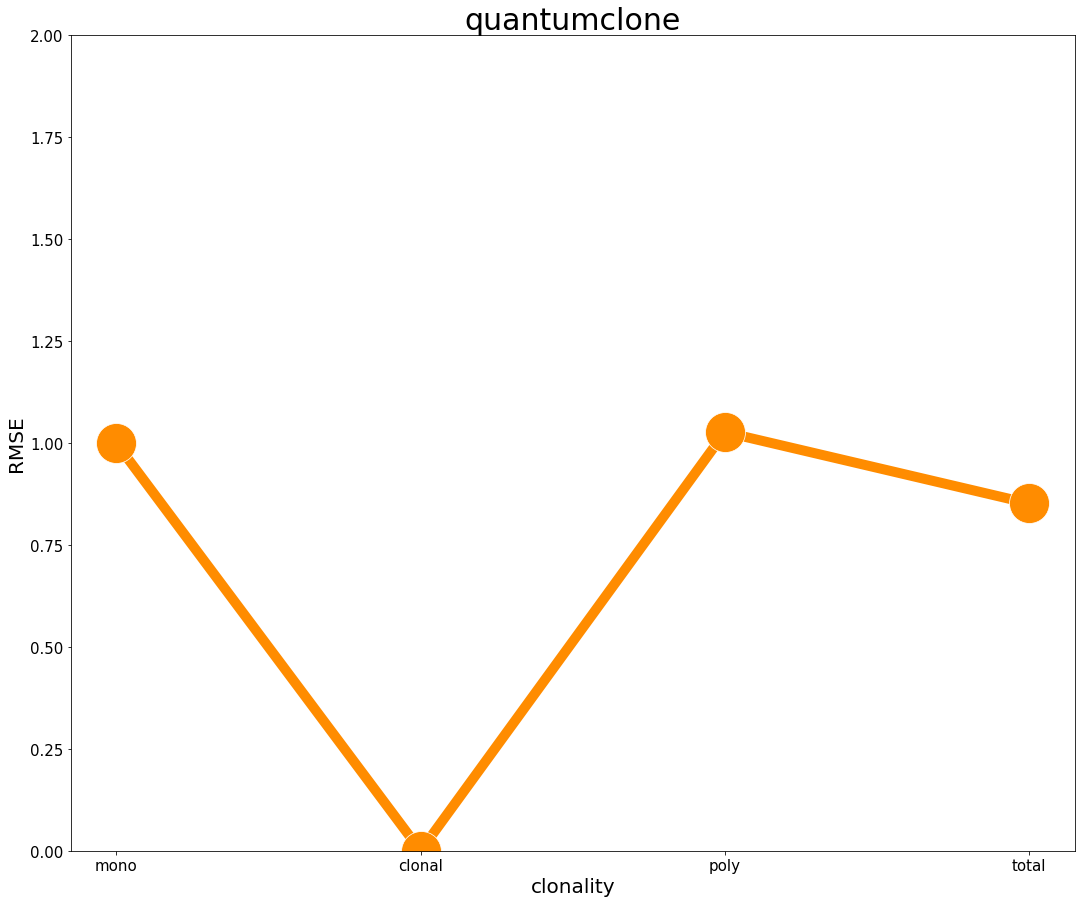

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning

error = 0

mono_x = []
mono_y = []
clonal_x = []
clonal_y = []
poly_x = []
poly_y = []

total_x = []
total_y = []

for sample in Moore_set:
        sample_dir = '/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/Moore_' + simulation + '/' + sample
        sample_set = [i for i in os.listdir(sample_dir)]
        
        for tissue in sample_set:
            if os.path.isfile(sample_dir + '/' + tissue + '/quantumclone.results.txt'):
                f = open(sample_dir + '/' + tissue + '/Moore.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        answer = int(fline.rstrip().split('\t')[1])
                        total_x.append(answer)
                        if answer == 1:
                            mono_x.append(answer)
                        elif answer == 2:
                            clonal_x.append(answer)
                        elif answer == 3:
                            poly_x.append(answer)
                        else:
                            print(answer)
                f.close()

                f = open(sample_dir + '/' + tissue + '/quantumclone.results.txt','r')
                for fline in f:
                    if fline.startswith('NUM_CLONE'):
                        predict = int(fline.rstrip().split('\t')[1])
                        if predict > 2:
                            predict = 3
                        total_y.append(predict)
                        if answer == 1:
                            mono_y.append(predict)
                        elif answer == 2:
                            clonal_y.append(predict)
                        elif answer == 3:
                            poly_y.append(predict)
                f.close()
            else:
                error += 1
                print(sample, tissue)
print('error',error)

mono_RMSE = mean_squared_error(mono_x , mono_y) ** 0.5
clonal_RMSE = mean_squared_error(clonal_x , clonal_y) ** 0.5
poly_RMSE = mean_squared_error(poly_x , poly_y) ** 0.5
total_RMSE = mean_squared_error(total_x , total_y) ** 0.5
print(mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE)
x_axis = ['mono', 'clonal', 'poly', 'total']
y_axis = [mono_RMSE, clonal_RMSE, poly_RMSE, total_RMSE]
fo.write('quantumclone' + '\t' + 'mono' + '\t' + str(mono_RMSE) + '\n')
fo.write('quantumclone' + '\t' + 'bi' + '\t' + str(clonal_RMSE) + '\n')
fo.write('quantumclone' + '\t' + 'poly' + '\t' + str(poly_RMSE) + '\n')
fo.write('quantumclone' + '\t' + 'total' + '\t' + str(total_RMSE) + '\n')

fig = plt.figure(figsize = (18,15))
ax = sns.lineplot(x_axis, y_axis, marker = 'o', markersize = 40, color = 'darkorange', linewidth = 10, linestyle = 'solid') # 3D

plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('clonality', fontsize = 20)
ax.set_ylabel('RMSE', fontsize = 20)
ax.set_title('quantumclone', fontsize=30)

sc = ax.set_ylim(0, 2)
# sc = ax.set_xlim(0, 5)
# ax.figure.savefig('/data/project/Alzheimer/EM_cluster/00.RESULT/quantumclone.pdf')
ax.figure.savefig(output_dir + '/QUANTUM_2.pdf')
# mean_dic = {}
# for clone in range(1,4):
#     mean_dic[clone] = []

# for i,a in enumerate(x_axis):
#     mean_dic[x_axis[i]].append(y_axis[i])


In [51]:
fo.close()